# Hoja 1:

## Ejercicio 1: Órbita numérica y análisis gráfico

### Apartado A:

Implementa un codigo, al que llamo orb_num, que calcule la órbita numérica de un punto x0 hasta una iteración prefijada tan grande como quieras. El input debe ser: la función f, el dato inicial x0 € R, y el número n de términos de la órbita que se quieren calcular. El output debe ser una lista con los distintos puntos de la órbita x0, x1...xn.

In [579]:
import math
import matplotlib.pyplot as plt

def orb_num(f,x0,n):
    orbita = [x0]
    for _ in range (n):
        x0 = f(x0)
        orbita.append(x0)
    return orbita

### Apartado B:

Implementa otro código, al que llamo orb num av, que calcule los n primeros
términos de la orbita, pero sin devolver en el output los m primeros, con m < n.
De esta forma se consigue representar solamente valores avanzados de las órbitas y estudiar su convergencia sin llenar la pantalla de números.

In [580]:
def orb_num_av(f,x0,n,m):
    orb_entera = orb_num(f,x0,n)
    return orb_entera[m:]

### Apartado C:

Implementa un procedimiento an gráfico que pinte la gráfica de una función f definida en un intervalo [ab] y dibuje en la gráfica de f la órbita de un punto x0 hasta cierta iteración n. El input debe ser el dato inicial x0, la función f, los extremos ab del intervalo de definición de f, y el número n de iteraciones que se quiere dibujar, y el output debe ser un dibujo como los de las diapositivas.

In [581]:
import numpy as np

def an_grafico(x0, f, a, b, n):
    # Calcular la órbita usando orb_num
    orbit = orb_num(f, x0, n)
    
    # Creamos el linspace para poder mostrar mejor la gráfica
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)

    # Pintamos la f(x) en azul y ponemos la recta x=y con línea discontinua
    plt.plot(x_vals, y_vals, 'blue')
    plt.plot(x_vals, x_vals, 'k--')
    
    x_current = x0
    for y_current in orbit[1:]:
        # Pintamos la línea vertical desde el punto inicio hasta la gráfica f(x)
        plt.plot([x_current, x_current], [x_current, y_current], 'r', lw=1)
        plt.plot(x_current, y_current, 'ro', markersize=4)  # punto rojo
        
        # Pintamos la línea horizontal desde f(x) hasta la recta x=y
        plt.plot([x_current, y_current], [y_current, y_current], 'r', lw=1)
        plt.plot(y_current, y_current, 'ro', markersize=4)  # punto rojo

        # Definimos el nuevo punto de partida con x=y (está contenido en la recta)
        x_current = y_current

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Órbita numérica")
    plt.show()

### Apartado D:

 Implementa un procedimiento an_grafico_avanzado que pinte la gráfca de una función f definida en un intervalo [a,b] y dibuje en la gráfica de f la órbita de un punto x0 desde la iteración m hasta otra iteración n, con n > m. No se deben dibujar las m primeras iteraciones, solamente desde la m + 1 hasta la n. El input debe ser el dato
 inicial x0, la función f, los extremos ab del intervalo de definición de f, el número m de iteraciones que no hay que pintar, y el numero n en el que paras. El output debe ser un dibujo como los de las diapositivas.

In [582]:
def an_grafico_avanzado(x0, f, a, b, m, n):
    # Calcular la órbita usando orb_num
    orbit = orb_num_av(f, x0, n, m)
    
    # Creamos el linspace para poder mostrar mejor la gráfica
    x_vals = np.linspace(a, b, 500)
    f_vect = np.vectorize(f)
    y_vals = f_vect(x_vals)

    # Pintamos la f(x) en azul y ponemos la recta x=y con línea discontinua
    plt.plot(x_vals, y_vals, 'blue')
    plt.plot(x_vals, x_vals, 'k--')
    
    x_current = x0
    for y_current in orbit[1:]:
        # Pintamos la línea vertical desde el punto inicio hasta la gráfica f(x)
        plt.plot([x_current, x_current], [x_current, y_current], 'r', lw=1)
        plt.plot(x_current, y_current, 'ro', markersize=4)  # punto rojo
        # Pintamos la línea horizontal desde f(x) hasta la recta x=y
        plt.plot([x_current, y_current], [y_current, y_current], 'r', lw=1)
        plt.plot(y_current, y_current, 'ro', markersize=4)  # punto rojo
        # Definimos el nuevo punto de partida con x=y (está contenido en la recta)
        x_current = y_current

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Órbita numérica avanzada")
    plt.show()

## Ejercicio 2: 

### Apartado 1: Tomamos X = R, f : R R, f(x) = cx - 1 con c = 1.2, y los puntos x0 = 0.3, x0 = 0, x0 = -1.

####  Aplicar el procedimiento orb num para calcular los 20 primeros terminos de las órbitas de los puntos que se indican. Hacer lo mismo con el procedimiento an_grafico.

#### Aplicar orb_num_av para hallar estados avanzados de las órbitas (por ejemplo, mostrar las iteraciones de la 100 a la 120). Hacer lo mismo con an_gráfico avanzado.

#### Deducir en cada caso si las orbitas convergen a un punto de equilibrio, a un ciclo, o a nada, especificando a qué equilibrio o k-ciclo convergen, en caso de haber convergencia. Para hacer esto ultimo, puedes calcular órbitas de más puntos, si eso te ayuda.

[0.3, -0.64, -1.768, -3.1216, -4.74592, -6.695104, -9.034124799999999, -11.840949759999999, -15.209139711999999, -19.250967654399997, -24.101161185279995, -29.921393422335992, -36.90567210680319, -45.28680652816382, -55.34416783379658, -67.4130014005559, -81.89560168066707, -99.27472201680048, -120.12966642016058, -145.1555997041927, -175.18671964503122]


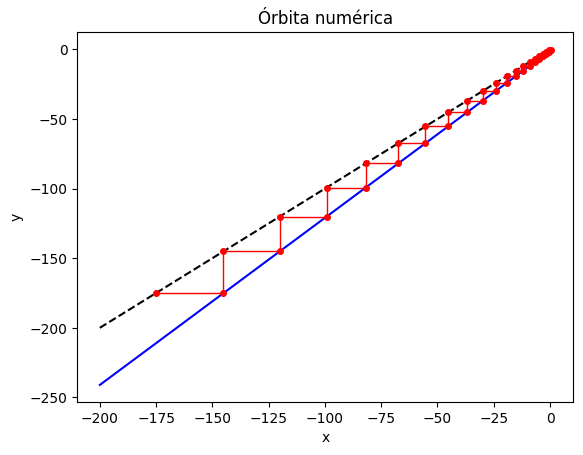

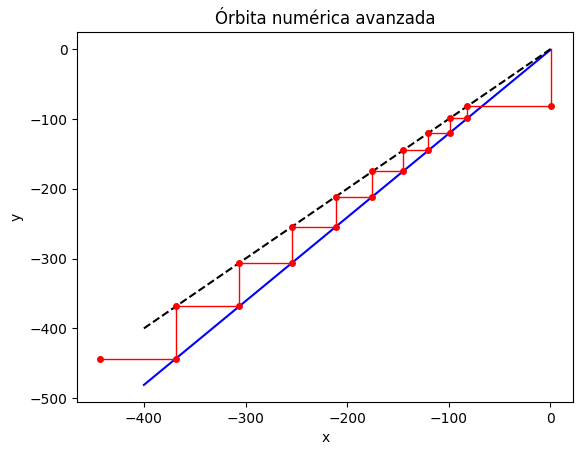

In [583]:
# Parámetros iniciales
n = 20
a = -200
b = 0

# Definimos f(x) = cx - 1
def f(x):
    c = 1.2
    return c*x - 1

# Para x(0) = 0.3
x0 = 0.3

print(orb_num(f,x0,n))
an_grafico(x0,f,a,b,n)

a = -400
an_grafico_avanzado(x0, f, a, b, 15, 25)

[0, -1.0, -2.2, -3.64, -5.368, -7.4416, -9.92992, -12.915904, -16.4990848, -20.798901759999996, -25.958682111999995, -32.15041853439999, -39.58050224127999, -48.49660268953598, -59.195923227443174, -72.0351078729318, -87.44212944751816, -105.93055533702179, -128.11666640442616, -154.73999968531137, -186.68799962237364]


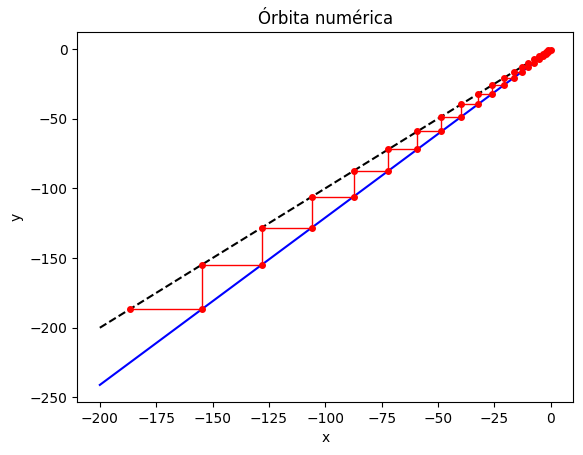

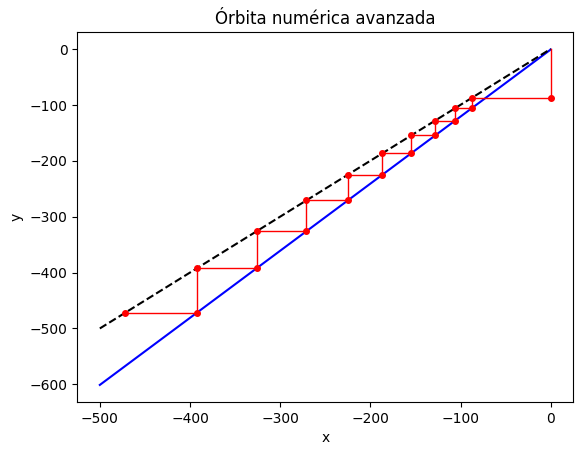

In [584]:
# Para x(0) = 0
x0 = 0
a = -200
b = 0

print(orb_num(f,x0,n))
an_grafico(x0,f,a,b,n)

a = -500
an_grafico_avanzado(x0, f, a, b, 15, 25)

[-1, -2.2, -3.64, -5.368, -7.4416, -9.92992, -12.915904, -16.4990848, -20.798901759999996, -25.958682111999995, -32.15041853439999, -39.58050224127999, -48.49660268953598, -59.195923227443174, -72.0351078729318, -87.44212944751816, -105.93055533702179, -128.11666640442616, -154.73999968531137, -186.68799962237364, -225.02559954684835]


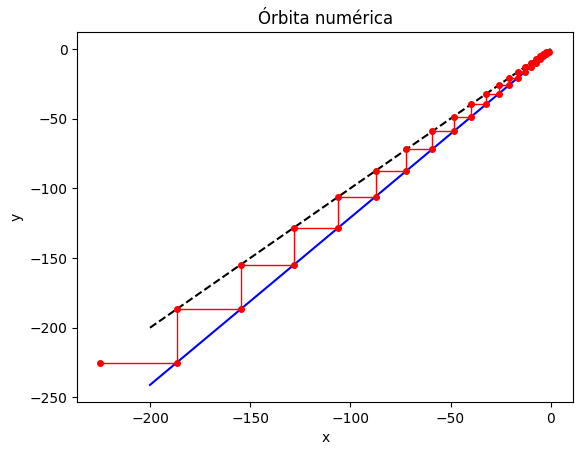

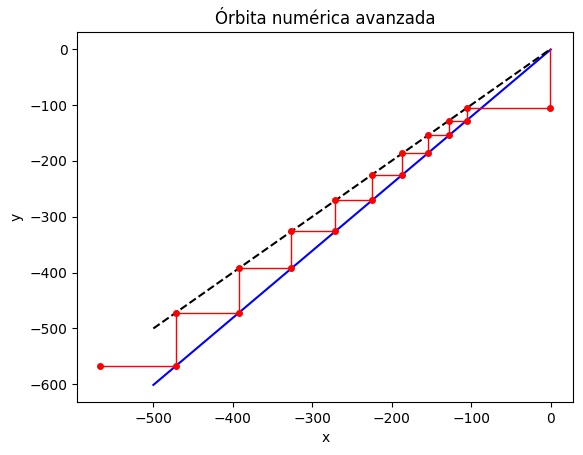

In [585]:
# Para x(0) = -1
x0 = -1
a = -200
b = 0

print(orb_num(f,x0,n))
an_grafico(x0,f,a,b,n)

a = -500
an_grafico_avanzado(x0, f, a, b, 15, 25)

### Apartado 2: Tomamos X = R, f : R->R dada por f(x)=cx+1 con c= -3/4 y los datos iniciales x0 = -100, x0 = 80, x0 = 0. ¿Observas la existencia de un punto fijo atractivo? ¿Puedes determinar su cuenca de atraccion?

[-100, 76.0, -56.0, 43.0, -31.25, 24.4375, -17.328125, 13.99609375, -9.4970703125, 8.122802734375, -5.09210205078125, 4.8190765380859375, -2.614307403564453, 2.96073055267334, -1.2205479145050049, 1.9154109358787537, -0.43655820190906525, 1.327418651431799, 0.004436011426150799, 0.9966729914303869, 0.2524952564272098]


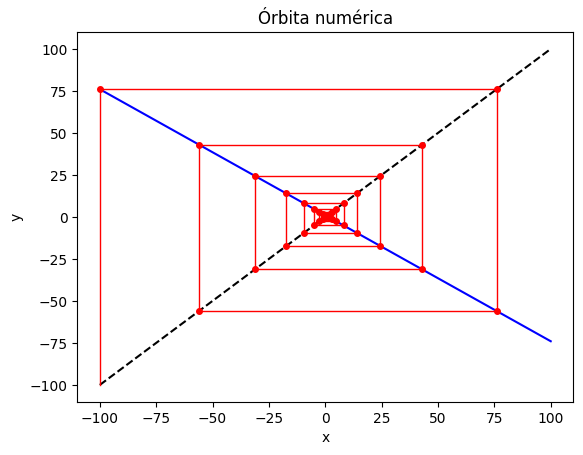

In [765]:
# Parámetros iniciales
n = 20
a = -100
b = 100

# Definimos f(x) = cx + 1
def f(x):
    c = -0.75
    return c*x + 1

# Para x(0) = -100
x0 = -100

print(orb_num(f,x0,n))
an_grafico(x0,f,a,b,n)


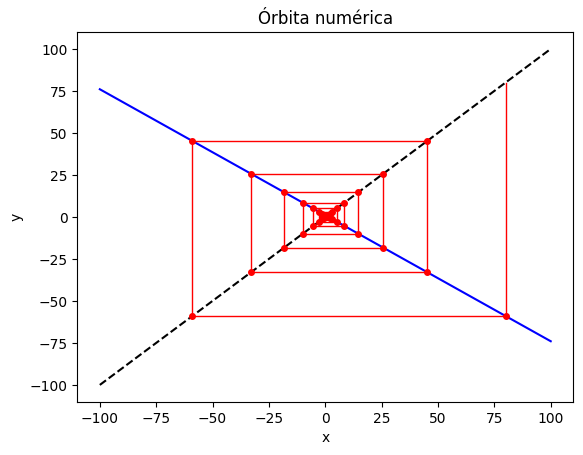

In [766]:
# Para x(0) = 80
x0 = 80

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

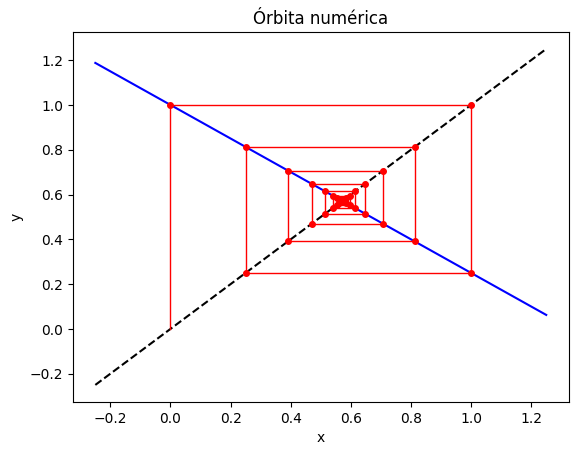

In [767]:
# Para x(0) = 0
x0 = 0
a = -0.25
b = 1.25

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

Hay un punto fijo atractivo aproximadamente en x = 0.58, y su cuenca de atracción es todo R.

### Apartado 3: (Ecuación Logística con c = 2.35). Tomamos X = [0,1] y f : [0,1]->[0,1] dada por f(x) = cx(1-x), con c = 2.35, y los datos iniciales x0 = 0.9, x0 = 0, x0 = 0.1, x0 = 0.5 ¿Observas la existencia de un punto fijo atractivo? ¿Puedes determinar su cuenca de atracción?

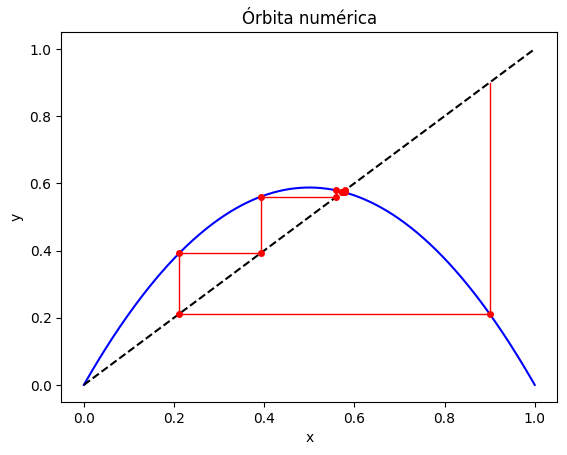

In [768]:
# Parámetros iniciales
n = 20
a = 0
b = 1

# Definimos f(x) = c*x*(1-x)
def f(x):
    c = 2.35
    return c*x*(1-x)

# Para x(0) = 0.9
x0 = 0.9

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

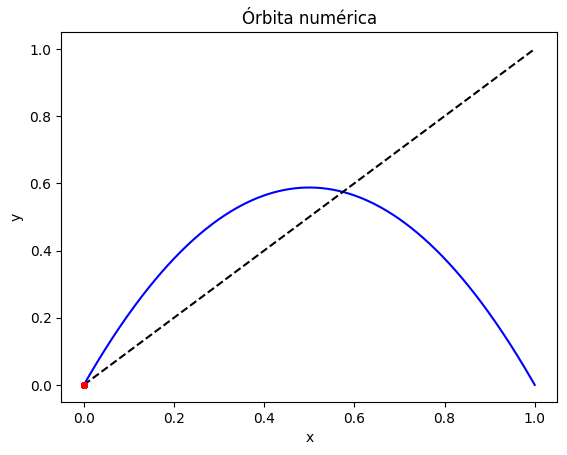

In [769]:
# Para x(0) = 0
x0 = 0

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

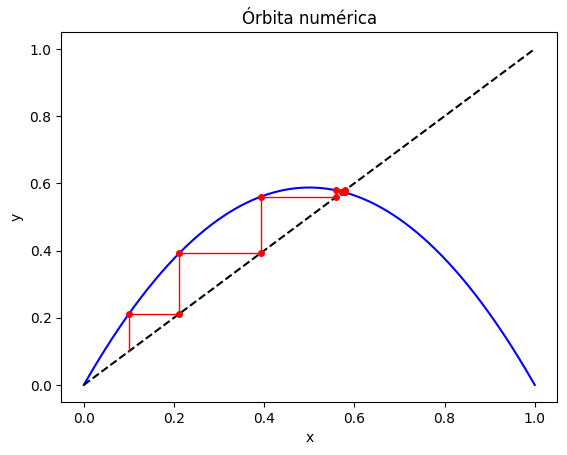

In [770]:
# Para x(0) = 0.1
x0 = 0.1

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

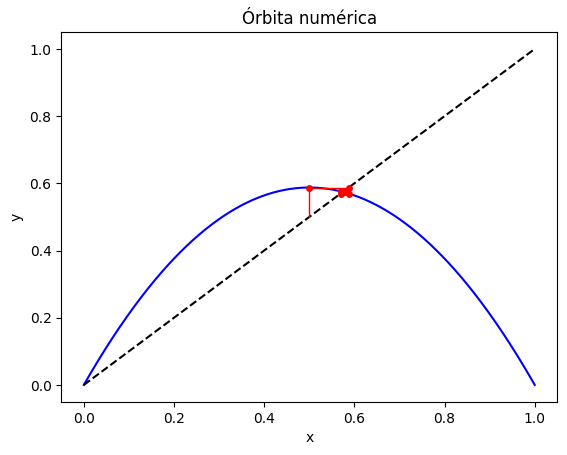

In [771]:
# Para x(0) = 0.5
x0 = 0.5

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

Sí hay un punto fijo atractivo, en torno a x = 0.57. También hay un punto fijo repulsivo, el x = 0. Por tanto, la cuenca de atracción es (0,1].

### Apartado 4: (Ecuación Logística con c = 3.35). Tomamos X = [0,1] y f : [0,1]->[0,1] dada por f(x) = cx(1-x), con c = 3.35, y los datos iniciales x0 = 0.9, x0 = 0, x0 = 0.1, x0 = 0.5 ¿Observas la existencia de un punto fijo repulsivo? ¿Y de un ciclo atractivo? ¿De qué periodo es el ciclo atractivo, en caso de haberlo?

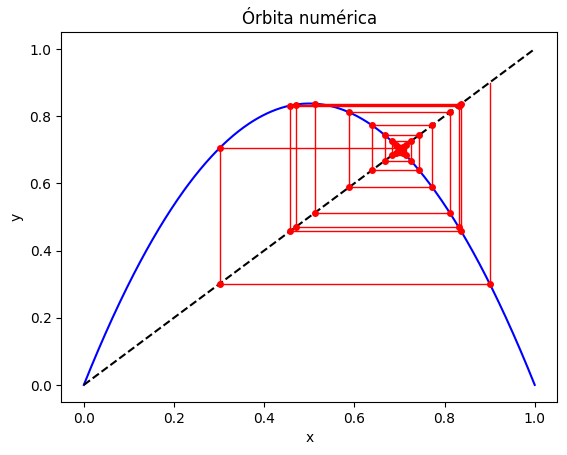

In [772]:
# Parámetros iniciales
n = 20
a = 0
b = 1

# Definimos f(x) = c*x*(1-x)
def f(x):
    c = 3.35
    return c*x*(1-x)

# Para x(0) = 0.9
x0 = 0.9

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

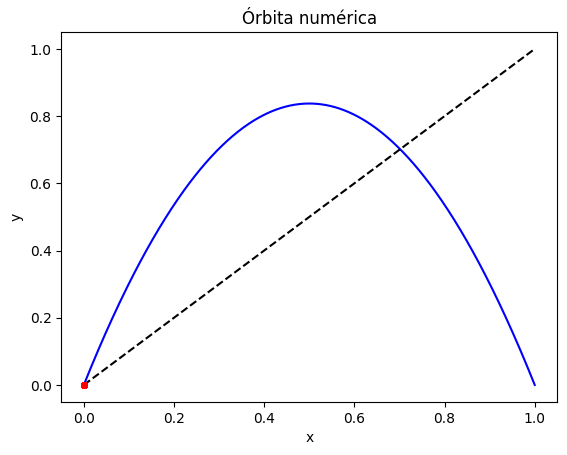

In [773]:
# Para x(0) = 0
x0 = 0

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

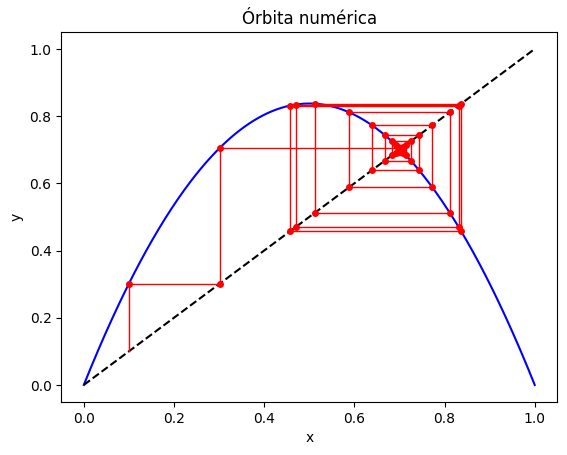

In [774]:
# Para x(0) = 0.1
x0 = 0.1

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

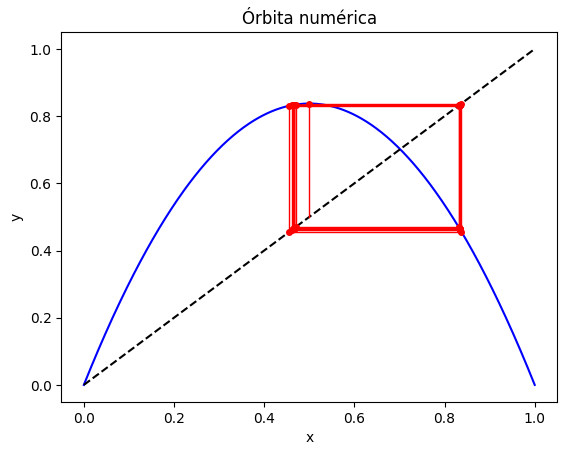

In [775]:
# Para x(0) = 0.5
x0 = 0.5

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

Hay un punto fijo repulsivo, que es x = 0. También, como se puede observar en la gráfica donde x0 = 0.5, hay un ciclo atractivo, de periodo 2, pues su órbita oscila entre dos valores. Adicionalmente se puede ver otro punto fijo repulsivo, en aproximadamente x = 0.7.

### Apartado 5: (Ecuación Logística con c = 3.55). Tomamos X = [0,1] y f : [0,1]->[0,1] dada por f(x) = cx(1-x), con c = 3.35, y los datos iniciales x0 = 0.9, x0 = 0, x0 = 0.1, x0 = 0.5 ¿Observas la existencia de puntos fijos repulsivos? ¿Y de un ciclo atractivo? ¿De qué periodo es el ciclo atractivo, en caso de haberlo?

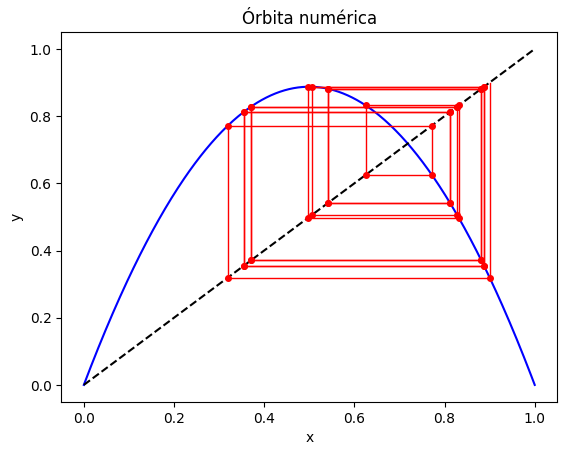

In [776]:
# Parámetros iniciales
n = 20
a = 0
b = 1

# Definimos f(x) = c*x*(1-x)
def f(x):
    c = 3.55
    return c*x*(1-x)

# Para x(0) = 0.9
x0 = 0.9

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

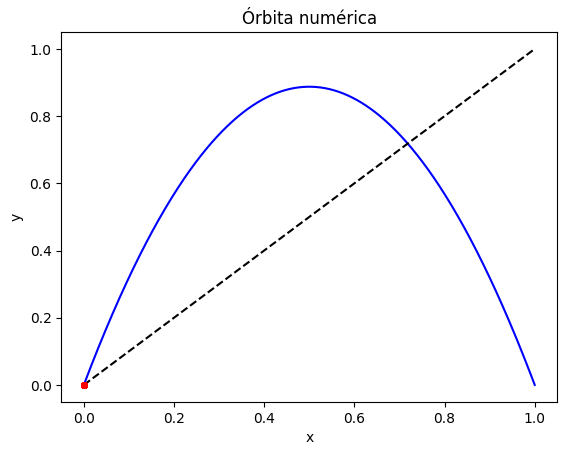

In [777]:
# Para x(0) = 0
x0 = 0

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

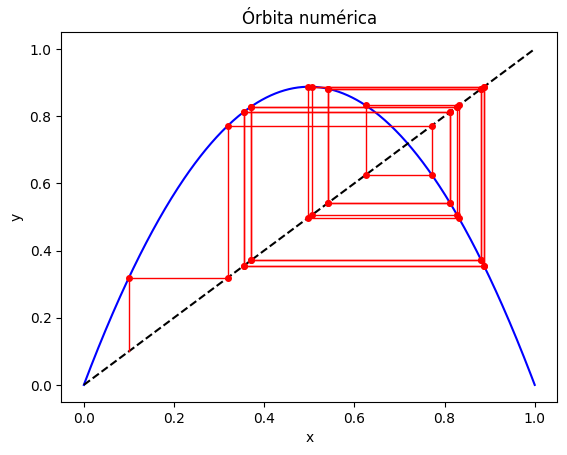

In [778]:
# Para x(0) = 0.1
x0 = 0.1

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

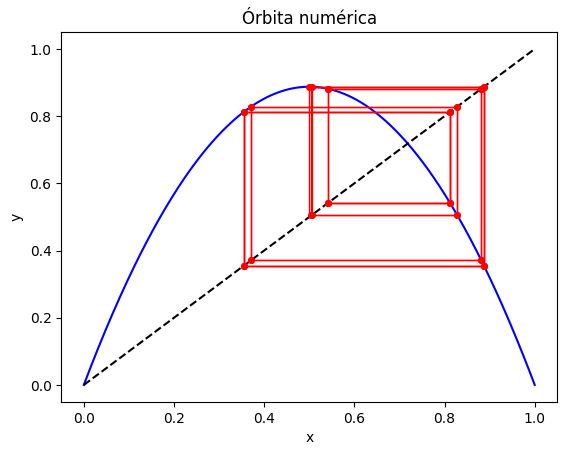

In [779]:
# Para x(0) = 0.5
x0 = 0.5

orb_num(f,x0,n)
an_grafico(x0,f,a,b,n)

En este caso también hay dos puntos fijos repulsivos, en x = 0 y en x = 0.7 aproximadamente. Tiene además un ciclo atractivo de periodo 4, como se puede observar muy bien en la figura última, donde x0 = 0.5, ya que la órbita oscila entre 4 valores distintos.